# Project: Investigate ( TMDb movie data set )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
we are investigating a data set about movies to learn more informations about it, know what people love to watch , what is the most genre the production companies focus on , what is the data that we need to know about the most successful movies, all of this is going to be explained in the project.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


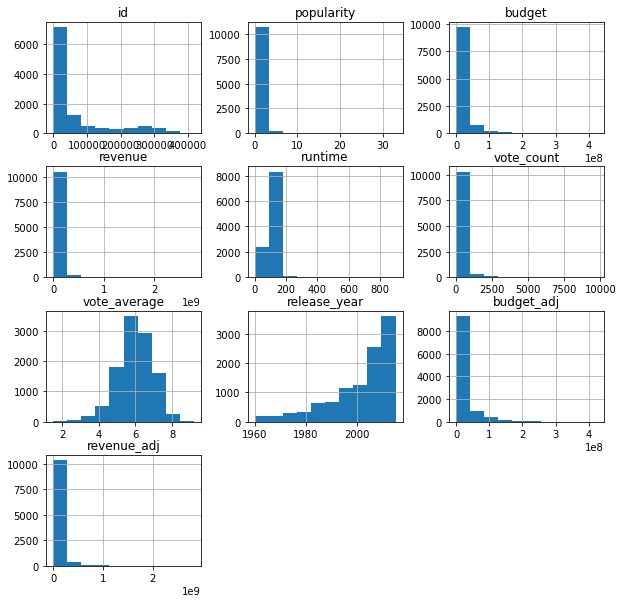

In [5]:
df.hist(figsize=(10,10));

### Data Cleaning (splitting columns and cleaning null values)
we need to deal with zero values by converting it to null values an drop it using 'dropna'to get clear data that we can get analysis out of it , we need to split columns which have more than one entry and separated be "|" and add it to new columns so we can analyse it easily and drop cloumns with data we don't need to get a more obvious view to data.

In [6]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)
df.shape


(1287, 21)

In [7]:
df_genres=df['genres'].str.split('|',expand=True).rename(columns=lambda x: f"genre{x+1}")
df_actors=df['cast'].str.split('|',expand=True).rename(columns=lambda x: f'actor{x+1}')
df_production=df['production_companies'].str.split('|',expand=True).rename(columns=lambda x: f'production_company{x+1}')
df.drop(['genres','cast','production_companies'],axis=1,inplace=True)
df=df.join([df_genres,df_actors,df_production])
df

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,actor1,actor2,actor3,actor4,actor5,production_company1,production_company2,production_company3,production_company4,production_company5
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,253,tt0070328,1.549139,7000000.0,1.617778e+08,Live and Let Die,http://www.mgm.com/view/movie/1130/Live-and-Le...,Guy Hamilton,Roger Moore is James Bond.,london|new york|bomb|england|spy,...,Roger Moore,Yaphet Kotto,Jane Seymour,Clifton James,Julius Harris,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10689,660,tt0059800,1.910465,11000000.0,1.411957e+08,Thunderball,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,paris|florida|fighter pilot|sanatorium|secret ...,...,Sean Connery,Claudine Auger,Adolfo Celi,Luciana Paluzzi,Rik Van Nutter,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10724,668,tt0064757,1.778746,7000000.0,8.197449e+07,On Her Majesty's Secret Service,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,london|suicide|england|switzerland|secret iden...,...,George Lazenby,Diana Rigg,Telly Savalas,Gabriele Ferzetti,Ilse Steppat,Eon Productions,Metro-Goldwyn-Mayer (MGM),Danjaq,None,None
10759,948,tt0077651,1.198849,300000.0,7.000000e+07,Halloween,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,female nudity|nudity|mask|babysitter|halloween,...,Donald Pleasence,Jamie Lee Curtis,P.J. Soles,Nancy Kyes,Nick Castle,Compass International Pictures,Falcon International Productions,None,None,None


In [8]:
df.drop(['imdb_id','homepage','tagline','overview','release_date','keywords'],axis=1,inplace=True)
df

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,...,actor1,actor2,actor3,actor4,actor5,production_company1,production_company2,production_company3,production_company4,production_company5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,6185,7.1,2015,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,2480,6.3,2015,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,5292,7.5,2015,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,2947,7.3,2015,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,253,1.549139,7000000.0,1.617778e+08,Live and Let Die,Guy Hamilton,121.0,293,6.1,1973,...,Roger Moore,Yaphet Kotto,Jane Seymour,Clifton James,Julius Harris,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10689,660,1.910465,11000000.0,1.411957e+08,Thunderball,Terence Young,130.0,331,6.3,1965,...,Sean Connery,Claudine Auger,Adolfo Celi,Luciana Paluzzi,Rik Van Nutter,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10724,668,1.778746,7000000.0,8.197449e+07,On Her Majesty's Secret Service,Peter R. Hunt,142.0,258,6.4,1969,...,George Lazenby,Diana Rigg,Telly Savalas,Gabriele Ferzetti,Ilse Steppat,Eon Productions,Metro-Goldwyn-Mayer (MGM),Danjaq,None,None
10759,948,1.198849,300000.0,7.000000e+07,Halloween,John Carpenter,91.0,522,7.3,1978,...,Donald Pleasence,Jamie Lee Curtis,P.J. Soles,Nancy Kyes,Nick Castle,Compass International Pictures,Falcon International Productions,None,None,None


In [9]:
df['original_title'].value_counts()

Halloween                2
The Three Musketeers     2
Wanted                   2
The Thing                2
Halloween II             2
                        ..
The Boondock Saints      1
The Cider House Rules    1
End of Days              1
Eyes Wide Shut           1
Animal House             1
Name: original_title, Length: 1280, dtype: int64

Since the title column has double entries of movie names, a function "info_about_duplicateTitles" will be defined to have a close look on the rows with same movie title.

In [10]:
duplicate_titles = df['original_title'].value_counts().index.tolist()
duplicate_titles = duplicate_titles[:5]
duplicate_titles

['Halloween', 'The Three Musketeers', 'Wanted', 'The Thing', 'Halloween II']

In [11]:
def info_about_duplicateTitles ():
    for duplicate_title in duplicate_titles :
        df_duplicate_title = df[df['original_title'] ==  duplicate_title]
        print(df_duplicate_title.iloc[:6])
info_about_duplicateTitles()

         id  popularity      budget     revenue original_title  \
7483   2082    0.809646  15000000.0  80253908.0      Halloween   
10759   948    1.198849    300000.0  70000000.0      Halloween   

             director  runtime  vote_count  vote_average  release_year  ...  \
7483       Rob Zombie    109.0         241           5.8          2007  ...   
10759  John Carpenter     91.0         522           7.3          1978  ...   

                 actor1            actor2       actor3      actor4  \
7483   Malcolm McDowell       Brad Dourif  Daeg Faerch  Tyler Mane   
10759  Donald Pleasence  Jamie Lee Curtis   P.J. Soles  Nancy Kyes   

                     actor5             production_company1  \
7483   Scout Taylor-Compton                 Dimension Films   
10759           Nick Castle  Compass International Pictures   

                    production_company2    production_company3  \
7483      Spectacle Entertainment Group  Nightfall Productions   
10759  Falcon International Pr

In [12]:
df.duplicated().sum()

0

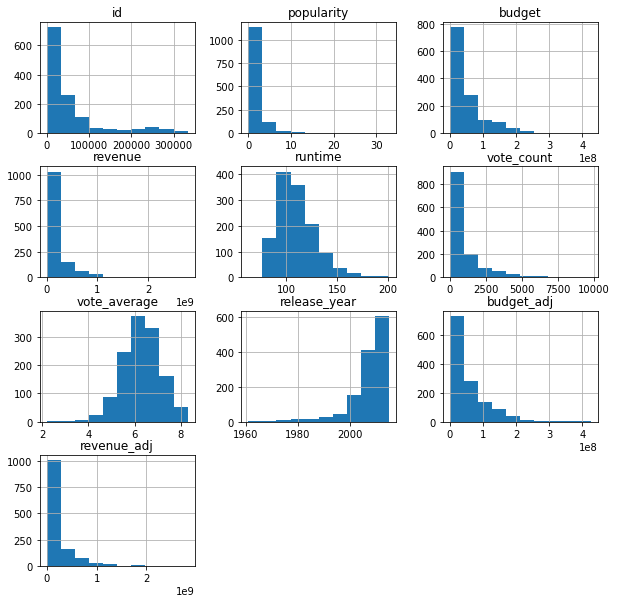

In [13]:
df.hist(figsize=(10,10));

<a id='eda'></a>
### Research Question 1 (Which genres are most popular from year to year)

In [14]:
## here we are making a data frame that contains only columns with genres and release year to get the most porduced genre
## in each year
df_genres = df.loc[:, 'genre1': 'genre5' ] 
df_genres=df_genres.join([df['release_year']])
df_genres


,genre1,genre2,genre3,genre4,genre5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015
...,...,...,...,...,...,...
10595,Adventure,Action,Thriller,None,None,1973
10689,Adventure,Action,Thriller,None,None,1965
10724,Adventure,Action,Thriller,None,None,1969
10759,Horror,Thriller,None,None,None,1978


In [15]:
## here we are making a list that contains years without any repetation so we can do a for loop to every year in the list
years=df_genres['release_year'].unique()
years

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1974, 1975, 1962, 1964, 1971, 1990, 1961, 1993,
       1967, 1963, 1986, 1973, 1965, 1969, 1978], dtype=int64)

In [16]:
## we are creating an empty list so we can add elements to by using the for loop 
most_common=[]
for year in years :
    x=df_genres[df_genres['release_year']==year]
    y=x.drop(['release_year'],axis=1).stack().value_counts().idxmax()
    ## here we are getting the most preferd genre according to vote ratings 
    z=df[df['release_year']==year].groupby(['genre1'])['vote_average'].mean().idxmax()
    if y == z:
        s = 'Same'
    else:
        s = 'Not Same'
    most_common.append((year,y,z,s))
## now we are converting the list to a data frame and arrange it ascendingly according to years  
df_common_genre=pd.DataFrame(most_common,columns=('year','most produced gender','prefered gender','is the Same?')).sort_values('year').reset_index().drop('index',axis=1)
df_common_genre

,year,most produced gender,prefered gender,is the Same?
0,1961,Comedy,Comedy,Same
1,1962,Adventure,Adventure,Same
2,1963,Action,Action,Same
3,1964,Adventure,Adventure,Same
4,1965,Adventure,Adventure,Same
5,1967,Action,Action,Same
6,1969,Adventure,Adventure,Same
7,1971,Thriller,Action,Not Same
8,1972,Drama,Drama,Same
9,1973,Thriller,Drama,Not Same


In [17]:
df_common_genre['most produced gender'].mode()[0]

'Drama'

In [18]:
df_common_genre['prefered gender'].mode()[0]

'Adventure'

In [19]:
df_common_genre['is the Same?'].value_counts()

Not Same    31
Same        20
Name: is the Same?, dtype: int64

we can notice that through the years the most produced genre by production companies is the 'Drama' genre and the most 
prefered genre is the 'adventure' genre

### Research Question 2  (What are the properties of movies that have high revenues)

In [20]:
## we are getting more information about revenues so we can know what to be considered high revenues
df['revenue_adj'].describe()


count    1.287000e+03
mean     1.991775e+08
std      2.968515e+08
min      4.300000e+01
25%      2.764890e+07
50%      8.674770e+07
75%      2.351178e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [21]:
## we are making a data frame that contains movies with revenues that are above 75% of revenues and we can consider it 
## as the data frame of high revenue movies 
high_rev=df.query('revenue_adj>=2.351178e+08')
high_rev

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,...,actor1,actor2,actor3,actor4,actor5,production_company1,production_company2,production_company3,production_company4,production_company5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,6185,7.1,2015,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,2480,6.3,2015,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,5292,7.5,2015,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,2947,7.3,2015,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,9552,2.010733,8000000.0,4.413061e+08,The Exorcist,William Friedkin,122.0,1113,7.2,1973,...,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,Warner Bros.,Hoya Productions,None,None,None
10595,253,1.549139,7000000.0,1.617778e+08,Live and Let Die,Guy Hamilton,121.0,293,6.1,1973,...,Roger Moore,Yaphet Kotto,Jane Seymour,Clifton James,Julius Harris,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10689,660,1.910465,11000000.0,1.411957e+08,Thunderball,Terence Young,130.0,331,6.3,1965,...,Sean Connery,Claudine Auger,Adolfo Celi,Luciana Paluzzi,Rik Van Nutter,Eon Productions,Metro-Goldwyn-Mayer (MGM),None,None,None
10724,668,1.778746,7000000.0,8.197449e+07,On Her Majesty's Secret Service,Peter R. Hunt,142.0,258,6.4,1969,...,George Lazenby,Diana Rigg,Telly Savalas,Gabriele Ferzetti,Ilse Steppat,Eon Productions,Metro-Goldwyn-Mayer (MGM),Danjaq,None,None


In [22]:
## here we are getting the infromation needed about the movies that had the highest revenues an are arrnging it descendigly
df_revenue=high_rev.groupby(['genre1','actor1','production_company1','director','runtime'])['revenue_adj'].mean()
df_high_revenue=pd.DataFrame(df_revenue).sort_values('revenue_adj',ascending=False)
df_high_revenue.head()

revenue_adj
genre1    actor1          production_company1     director         runtime              
Action    Sam Worthington Ingenious Film Partners James Cameron    162.0    2.827124e+09
Adventure Mark Hamill     Lucasfilm               George Lucas     121.0    2.789712e+09
Drama     Kate Winslet    Paramount Pictures      James Cameron    194.0    2.506406e+09
          Linda Blair     Warner Bros.            William Friedkin 122.0    2.167325e+09
Horror    Roy Scheider    Universal Pictures      Steven Spielberg 124.0    1.907006e+09

In [23]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.189301,-0.050921,-0.031441,-0.013123,0.059368,0.004985,0.494397,-0.116021,-0.102211
popularity,0.189301,1.000000,0.432791,0.594755,0.322390,0.744088,0.355904,0.059243,0.419863,0.549299
budget,-0.050921,0.432791,1.000000,0.706888,0.337373,0.583038,0.075168,0.179160,0.985112,0.566835
revenue,-0.031441,0.594755,0.706888,1.000000,0.371226,0.775374,0.296501,0.028022,0.713706,0.913802
runtime,-0.013123,0.322390,0.337373,0.371226,1.000000,0.426505,0.385210,-0.071863,0.361985,0.371980
vote_count,0.059368,0.744088,0.583038,0.775374,0.426505,1.000000,0.464812,0.071290,0.572798,0.703183
vote_average,0.004985,0.355904,0.075168,0.296501,0.385210,0.464812,1.000000,-0.163737,0.088272,0.322503
release_year,0.494397,0.059243,0.179160,0.028022,-0.071863,0.071290,-0.163737,1.000000,0.056174,-0.228469
budget_adj,-0.116021,0.419863,0.985112,0.713706,0.361985,0.572798,0.088272,0.056174,1.000000,0.613093
revenue_adj,-0.102211,0.549299,0.566835,0.913802,0.371980,0.703183,0.322503,-0.228469,0.613093,1.000000


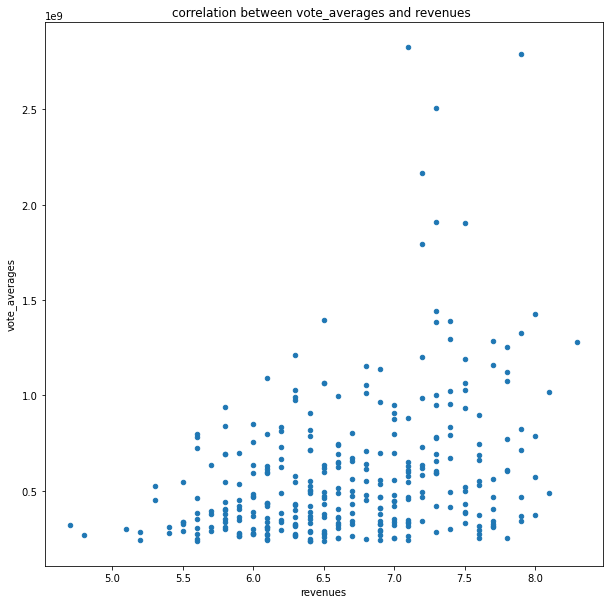

In [24]:
high_rev.plot(x='vote_average' ,y='revenue_adj',kind='scatter',figsize=(10,10));
plt.title('correlation between vote_averages and revenues ');
plt.ylabel('vote_averages');
plt.xlabel('revenues');

this graph shows that movies with most revenues have a high vote average rating

## Q3( Which actors are the most popular? )

In [28]:
actors = df.loc[:,'actor1':'actor5']
actors

,actor1,actor2,actor3,actor4,actor5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
10595,Roger Moore,Yaphet Kotto,Jane Seymour,Clifton James,Julius Harris
10689,Sean Connery,Claudine Auger,Adolfo Celi,Luciana Paluzzi,Rik Van Nutter
10724,George Lazenby,Diana Rigg,Telly Savalas,Gabriele Ferzetti,Ilse Steppat
10759,Donald Pleasence,Jamie Lee Curtis,P.J. Soles,Nancy Kyes,Nick Castle


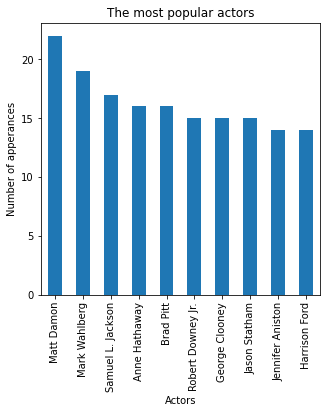

In [44]:
popular_actor = actors.stack().value_counts().head(10)
popular_actor.plot(kind='bar',figsize=(5,5));
plt.title('The most popular actors');
plt.xlabel('Actors');
plt.ylabel('Number of apperances');

this graph shows the most popular actors over these years 

<a id='conclusions'></a>
## Conclusions
The first research question "Which genres are most popular from year to year?" has shown surprising results, as the most popular genre differed from the most produced genre in 31 years from 50 years with percentage of 62%.

The second research question "What are the properties of movies that have high revenues?"has shown that Highest revenue movie is directed by James Cameron, Sam Worthington as actor , the genre is Action. The numeric columns of "popularity, budget and vote_count" show the highest correlations , Vote_count is showing that the more people vote for a movie, the higher the revenue is.

the third research question "Which actors are the most popular?" shows that 'matt damon' is the most the popular actor over these years
 
**All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. We have to consider that many entries in the dataset have been removed due to missing data**
